In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot


In [71]:
df= pd.read_csv("Admission_Predict.csv")

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [72]:
df.columns
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [73]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


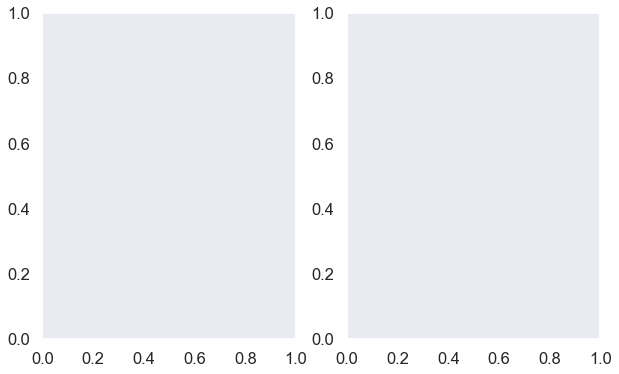

In [10]:
import seaborn as sns 
sns.set(style='dark',context='talk')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

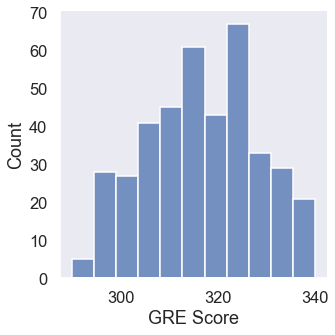

In [15]:
sns.displot(data=df,x='GRE Score',color="b");

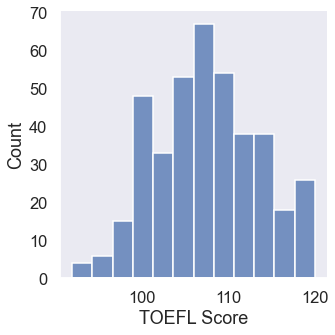

In [16]:
sns.displot(data=df,x='TOEFL Score')

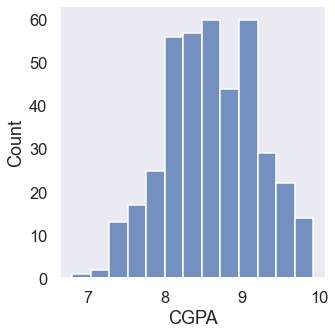

In [17]:
sns.displot(data=df,x='CGPA')

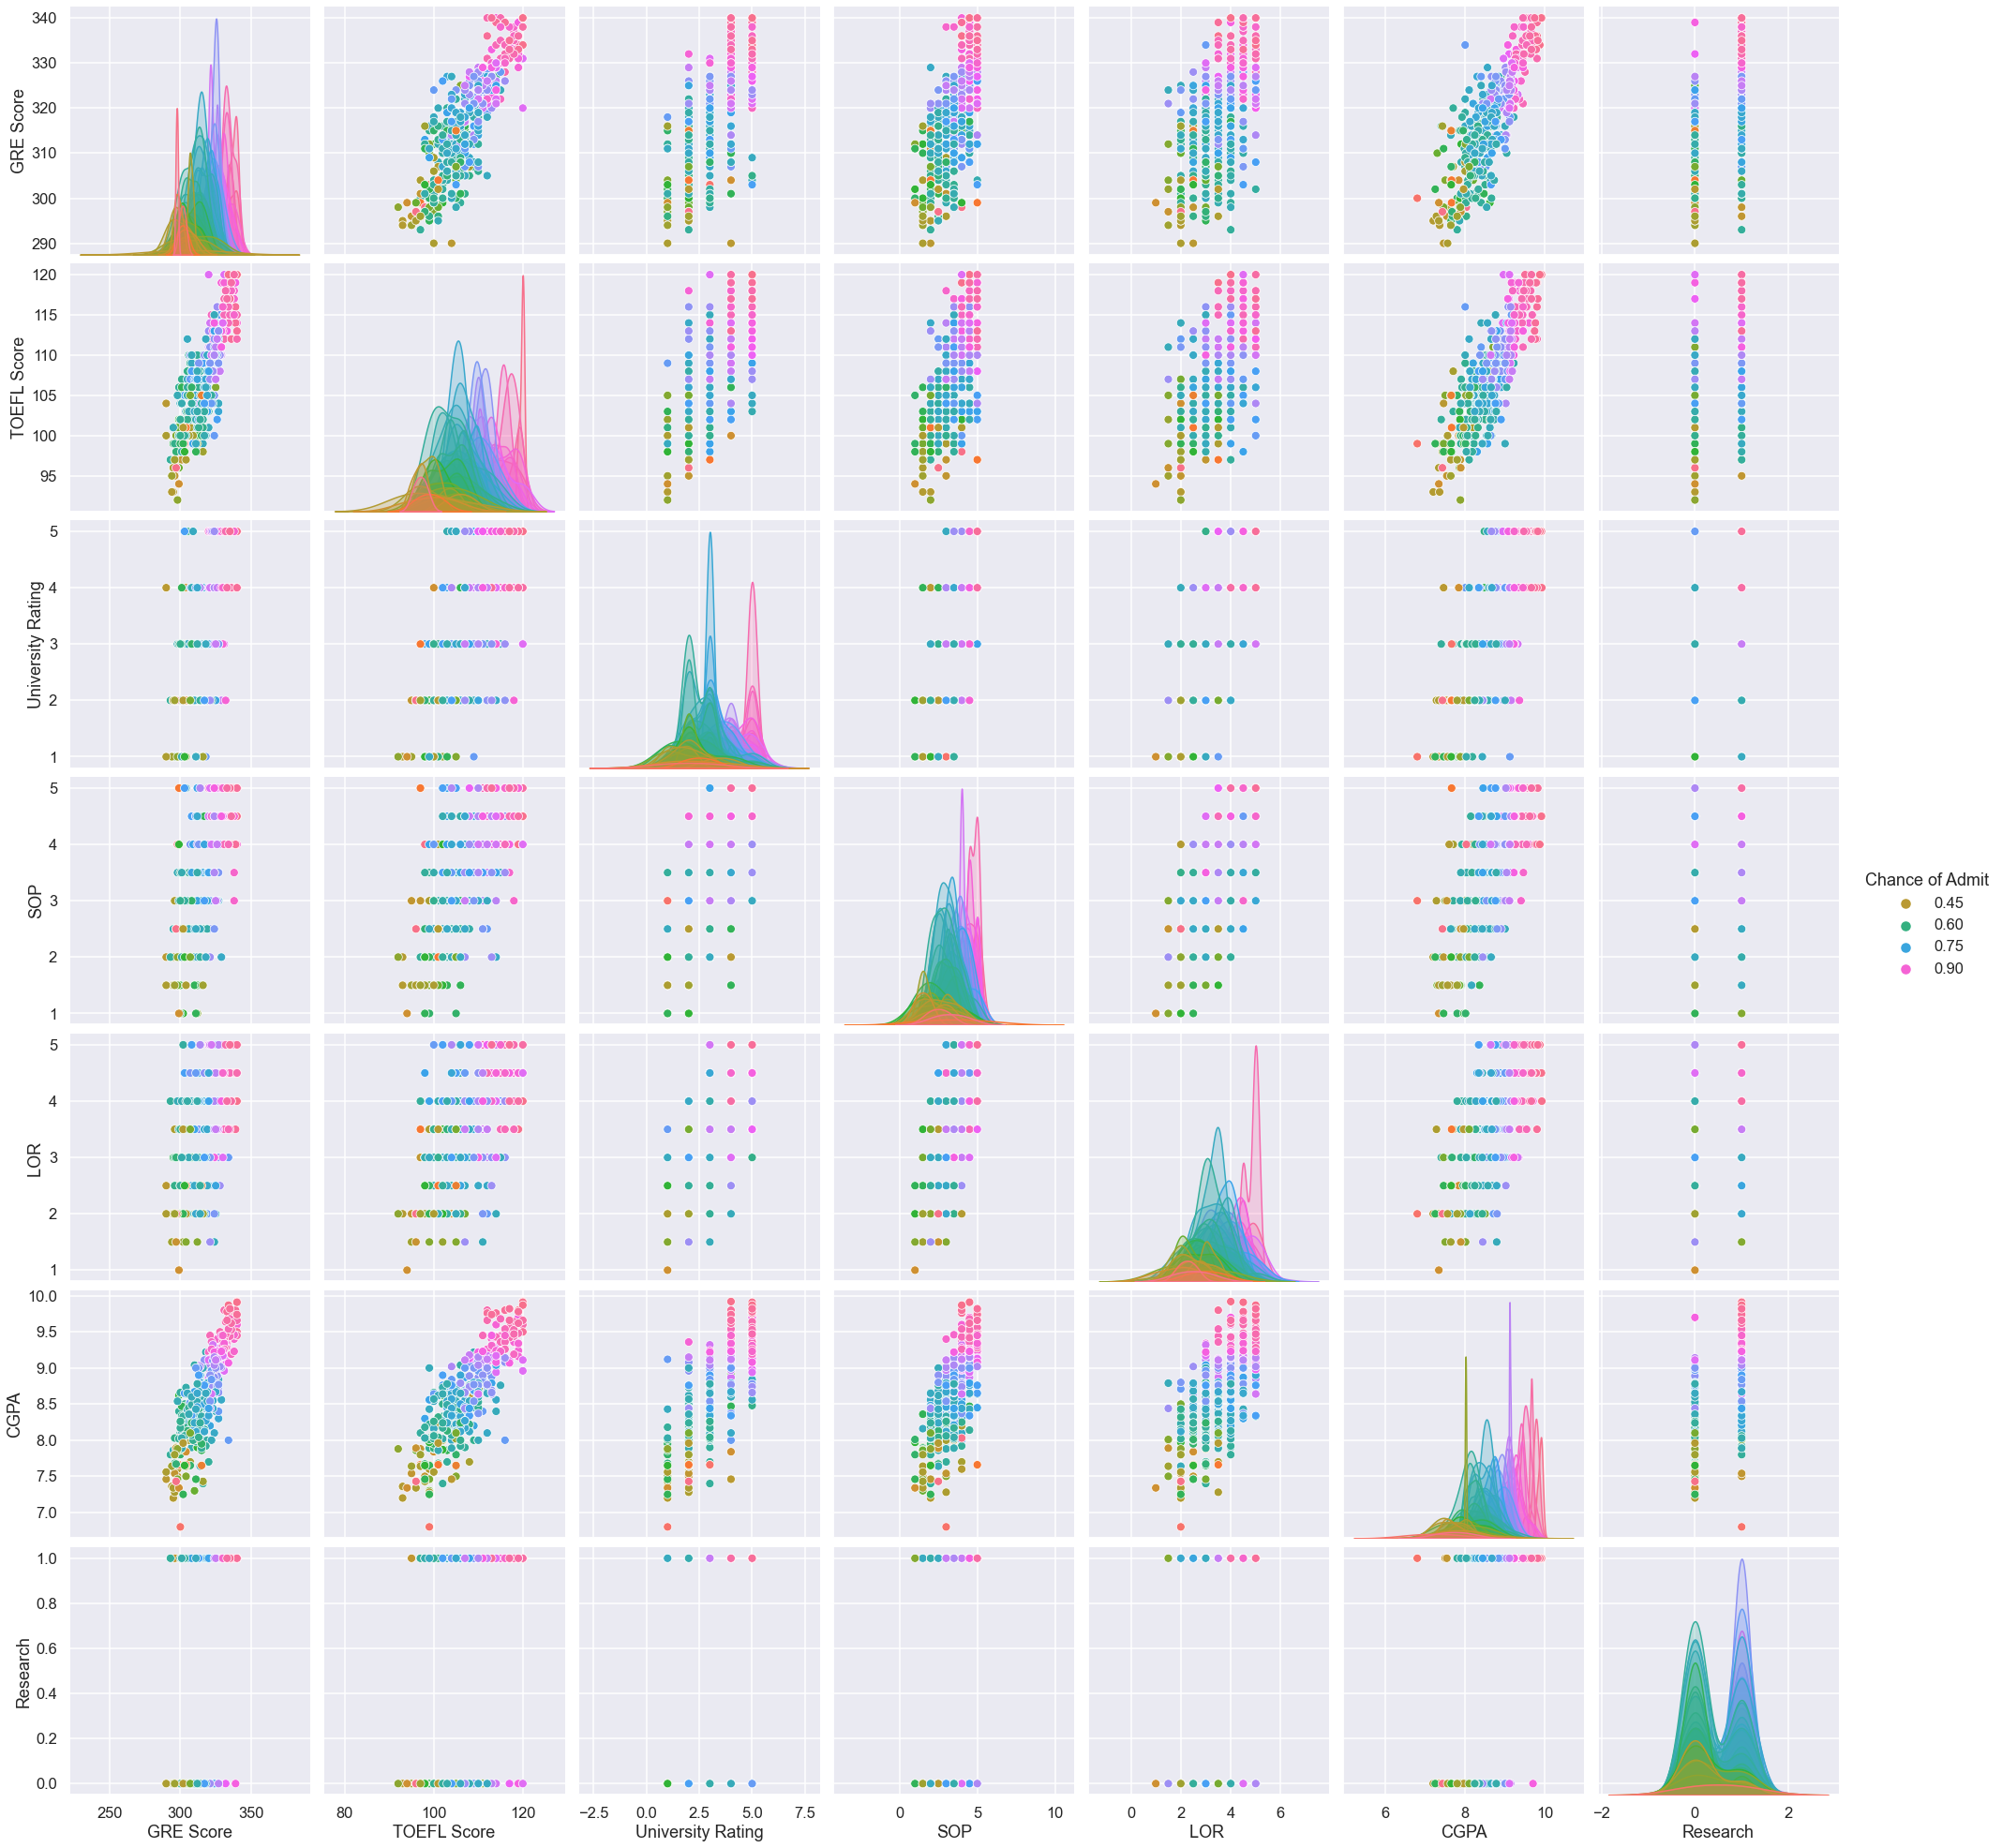

In [74]:
sns.pairplot(df,hue='Chance of Admit',palette='husl',x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'], y_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],size=4)


In [75]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   
outliers_to_drop=detect_outliers(df,2,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']) 

In [76]:
df.loc[outliers_to_drop]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [77]:
cols=df.drop(labels='Serial No.',axis=1)
cols.head().T

,0,1,2,3,4
GRE Score,337.00,324.00,316.00,322.00,314.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00
University Rating,4.00,4.00,3.00,3.00,2.00
SOP,4.50,4.00,3.00,3.50,2.00
LOR,4.50,4.50,3.50,2.50,3.00
CGPA,9.65,8.87,8.00,8.67,8.21
Research,1.00,1.00,1.00,1.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65


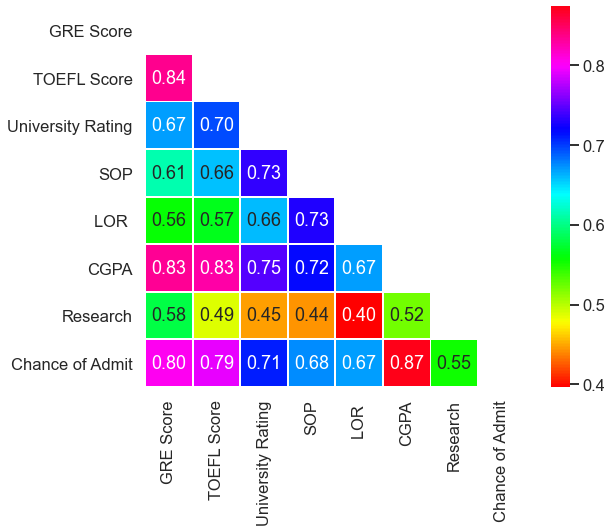

In [78]:
corr = cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

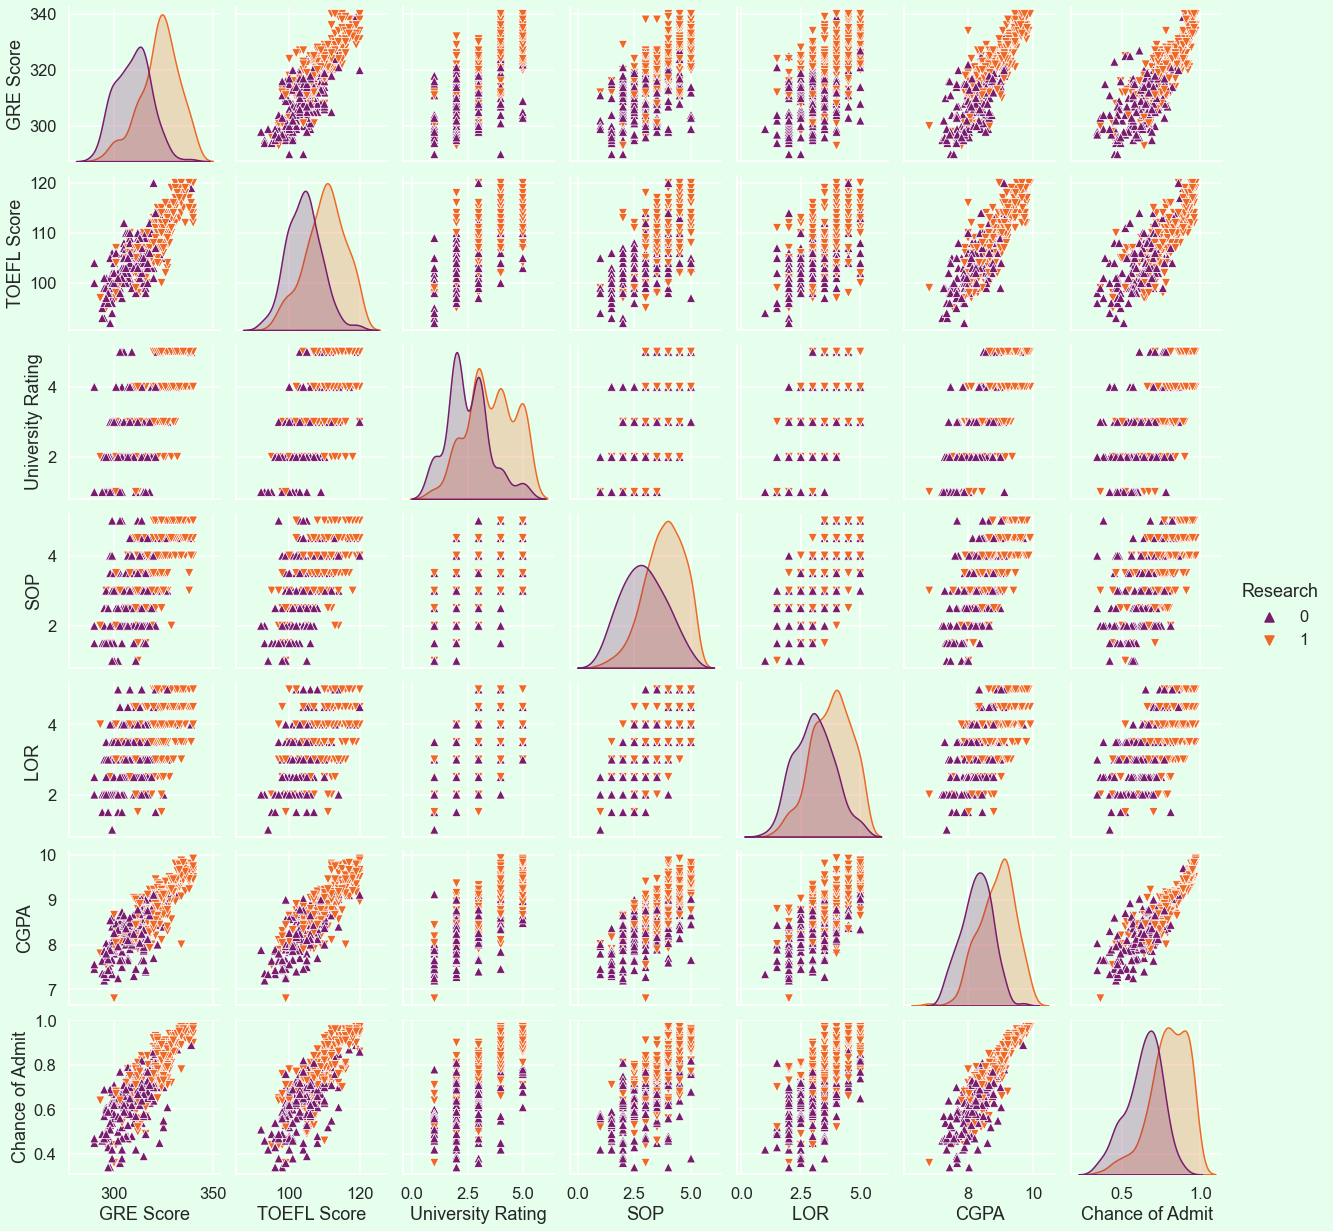

In [79]:

plt.rcParams['axes.facecolor'] = "#e6ffed"
plt.rcParams['figure.facecolor'] = "#e6ffed"
g = sns.pairplot(data=cols,hue='Research',markers=["^", "v"],palette='inferno')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

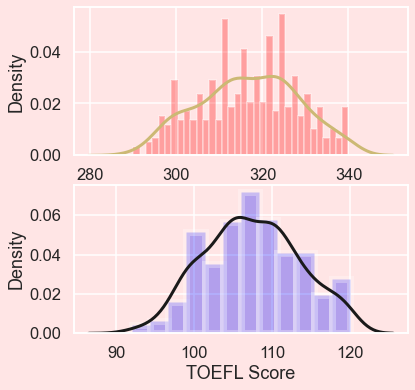

In [80]:

plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='Red',  kde_kws={"color": "y", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 2,"alpha": 0.3 })
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='Blue' ,kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 })

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

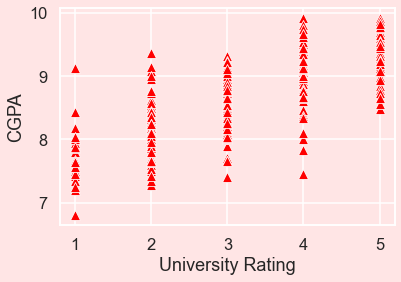

In [81]:
sns.scatterplot(x='University Rating',y='CGPA',data=df,color='Red', marker="^", s=100)

In [82]:
co_gre=df[df["GRE Score"]>=300]
co_toefel=df[df["TOEFL Score"]>=100]

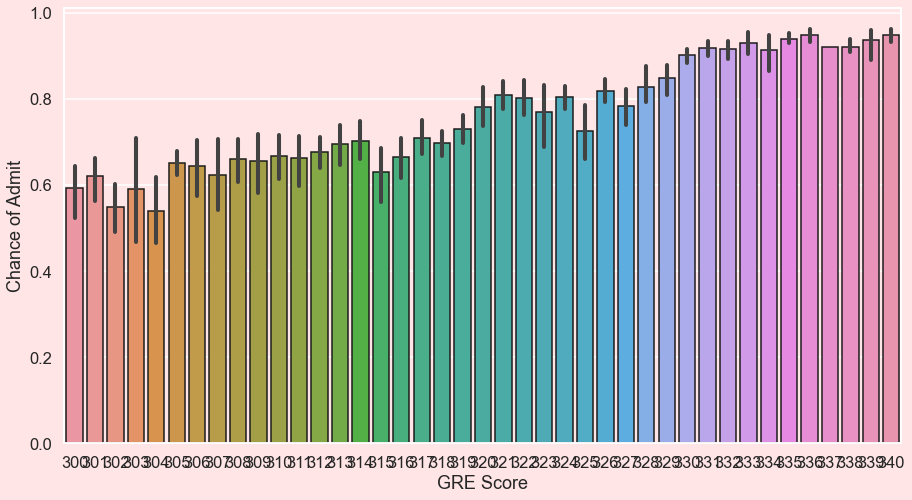

In [83]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='GRE Score',y='Chance of Admit',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

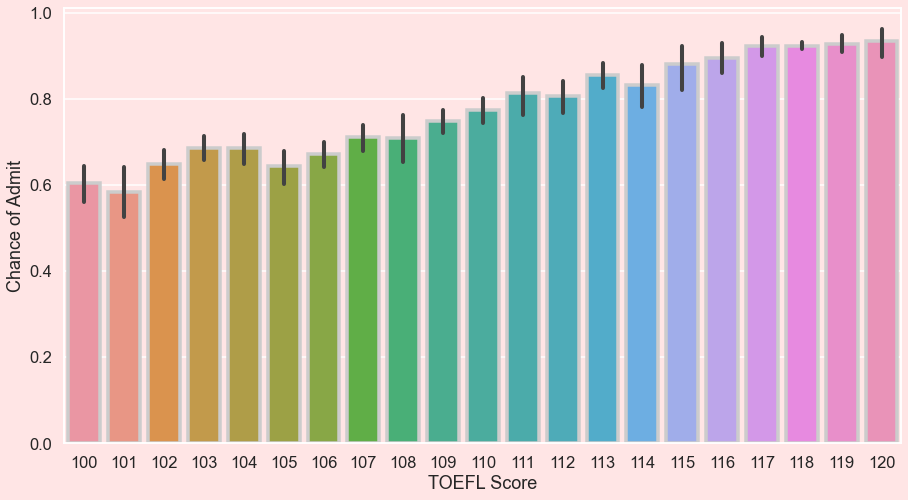

In [84]:

fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit',data=co_toefel, linewidth=3.5,edgecolor="0.8")
plt.show()

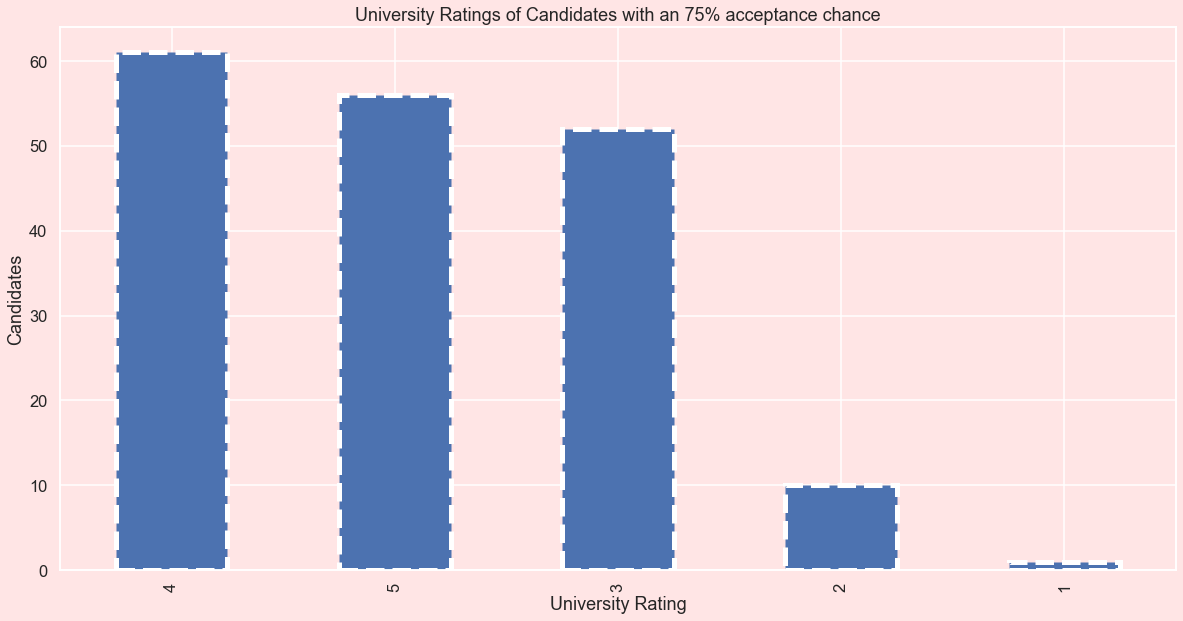

In [85]:

s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10),linestyle='dashed',linewidth=5)
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

In [86]:
print("Average GRE Score :{0:.2f} out of 340".format(df['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(df['Chance of Admit'].mean()*100))

Average GRE Score :316.81 out of 340
Average TOEFL Score:107.41 out of 120
Average CGPA:8.60 out of 10
Average Chance of getting admitted:72.44%


In [87]:
toppers=df[(df['GRE Score']>=330) & (df['TOEFL Score']>=115) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit'],ascending=False)
toppers

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
203,204,334,120,5,4.0,5.0,9.87,1,0.97
24,25,336,119,5,4.0,3.5,9.80,1,0.97
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
385,386,335,117,5,5.0,5.0,9.82,1,0.96
213,214,333,119,5,5.0,4.5,9.78,1,0.96
81,82,340,120,4,5.0,5.0,9.50,1,0.96
148,149,339,116,4,4.0,3.5,9.80,1,0.96
399,400,333,117,4,5.0,4.0,9.66,1,0.95
372,373,336,119,4,4.5,4.0,9.62,1,0.95


In [88]:
# reading the dataset
df= pd.read_csv("Admission_Predict.csv")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [89]:
X=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Normalisation works slightly better for Regression.
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

In [91]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [92]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)

Results...

Linear Regression : 0.07697452196086642
Decision Tree Regression : 0.11157956802210699
Random Forest Regression : 0.08623594088313757
Gradient Boosting Regression : 0.07330141925052482
Ada Boosting Regression : 0.07609288807441705
Extra Tree Regression : 0.08959185230812006
K-Neighbors Regression : 0.09130553104823387
Support Vector Regression : 0.14620768513203117


In [93]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression', 'Ada Boosting Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression' ]
x_ax=reg_pred


<AxesSubplot:>

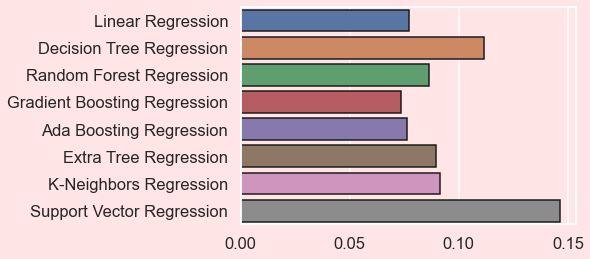

In [94]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")


In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [96]:
#If Chance of Admit greater than 80% we classify it as 1
y_train_c = [1 if each > 0.8 else 0 for each in y_train]
y_test_c  = [1 if each > 0.8 else 0 for each in y_test]

In [97]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train_c)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test_c,predictions))
    print(name,accuracy_score(y_test_c,predictions))

Logistic Regression : 0.9125
Decision Tree Classification : 0.925
Random Forest Classification : 0.9375
Gradient Boosting Classification : 0.9125
Ada Boosting Classification : 0.9125
Extra Tree Classification : 0.925
K-Neighbors Classification : 0.9375
Support Vector Classification : 0.9375
Gausian Naive Bayes : 0.9375


In [98]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
       'Gaussian Naive Bayes']
x_ax=cla_pred

Text(0.5, 0, 'Accuracy')

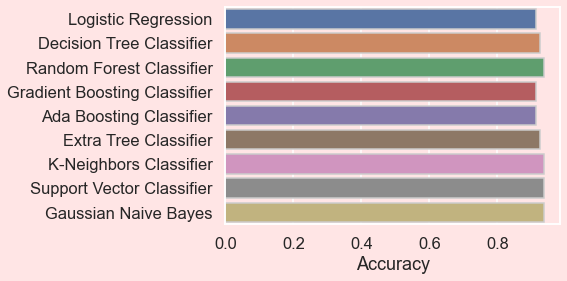

In [99]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.8")
plt.xlabel('Accuracy')

In [106]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
predictions2 = linear_regressor.predict(X_test)
predictions2

array([0.50167848, 0.6248231 , 0.64432138, 0.64282348, 0.6944492 ,
       0.70213463, 0.79808242, 0.49063897, 0.85977036, 0.80114104,
       0.78401777, 0.69797727, 0.88603069, 0.98255304, 0.57131272,
       0.747547  , 0.70141107, 0.65874174, 0.5057038 , 0.65022342,
       0.56365449, 0.65264939, 0.76998124, 0.61960894, 0.46333037,
       0.80630071, 0.76091947, 0.7190662 , 0.52188408, 0.82021175,
       0.72652906, 0.68794843, 0.54720748, 0.89248885, 0.5234737 ,
       0.5709845 , 0.6717365 , 0.58074569, 0.71209487, 0.71132015,
       0.63380392, 0.84679575, 0.89533348, 0.76179222, 0.71702598,
       0.9531109 , 0.6250396 , 0.72624091, 0.54867717, 0.69444765,
       0.59755508, 0.90569591, 0.78811058, 0.52790829, 0.74492255,
       0.74372306, 0.73015962, 0.61711736, 0.63597418, 0.53855759,
       0.51805085, 0.69808661, 0.55546695, 0.53924086, 0.72156914,
       0.59970211, 0.67812287, 0.65073301, 0.51603183, 0.66228324,
       0.49885761, 0.79031799, 0.80562415, 0.7366963 , 0.64918

In [100]:
import pickle

In [107]:
pickle.dump(linear_regressor,open('linear_regressor.pkl','wb'))

In [109]:
model = pickle.load(open('linear_regressor.pkl','rb'))